In [26]:
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
connection = mysql.connector.connect(
user='root',
password='root123',
host='localhost',
database='Suicide_data' # write here database name 
)

In [3]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()

In [6]:
cursor.execute('select * from StudentDemographics;')
data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])


In [7]:
cursor.execute('select * from SuicideCauses;')
df = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])


In [8]:
data.head() # first table name is StudentDemographics

,State,Year,Gender,AgeGroup,Total
0,A & N Islands,2001,Female,0-14,100
1,A & N Islands,2001,Female,15-29,150
2,A & N Islands,2001,Male,0-14,120
3,A & N Islands,2001,Male,15-29,180
4,A & N Islands,2002,Female,0-14,110


In [9]:
df.head() # second table name SuicideCauses

,State,Year,TypeCode,Type,Gender,AgeGroup,Total
0,A & N Islands,2001,Causes,Insanity/Mental Illness,Male,0-14,0
1,A & N Islands,2001,Causes,Love Affairs,Male,0-14,0
2,A & N Islands,2001,Causes,Fall in Social Reputation,Male,0-14,0
3,A & N Islands,2001,Causes,Dowry Dispute,Male,0-14,0
4,A & N Islands,2001,Causes,Ideological Causes/Hero Worshipping,Male,0-14,0


In [10]:
data.shape

(42, 5)

In [11]:
df.shape

(45, 7)

In [33]:
data.tail() # first table

,State,Year,Gender,AgeGroup,Total
37,Rajasthan,2001,Female,15-29,155
38,Rajasthan,2001,Male,0-14,125
39,Rajasthan,2001,Male,15-29,185
40,Rajasthan,2002,Female,0-14,100
41,Rajasthan,2002,Female,15-29,160


In [34]:
df.tail

<bound method NDFrame.tail of             State  Year TypeCode                                      Type  \
0   A & N Islands  2001   Causes                   Insanity/Mental Illness   
1   A & N Islands  2001   Causes                              Love Affairs   
2   A & N Islands  2001   Causes                 Fall in Social Reputation   
3   A & N Islands  2001   Causes                             Dowry Dispute   
4   A & N Islands  2001   Causes       Ideological Causes/Hero Worshipping   
5   A & N Islands  2001   Causes                    Illegitimate Pregnancy   
6   A & N Islands  2001   Causes                    Failure in Examination   
7   A & N Islands  2001   Causes   Bankruptcy or Sudden change in Economic   
8   A & N Islands  2001   Causes                   Insanity/Mental Illness   
9   A & N Islands  2001   Causes                                   Divorce   
10  A & N Islands  2001   Causes                Suspected/Illicit Relation   
11  A & N Islands  2001   Causes  

In [35]:
data.describe() # basic statistic

,Year,Total
count,42.000000,42.000000
mean,2001.619048,138.809524
std,0.660834,33.272884
min,2001.000000,85.000000
25%,2001.000000,110.000000
50%,2002.000000,137.500000
75%,2002.000000,163.750000
max,2003.000000,195.000000


# Filtering Data

In [13]:
datagender_filtered = data[data['Gender'] == 'Female']
datagender_filtered 

,State,Year,Gender,AgeGroup,Total
0,A & N Islands,2001,Female,0-14,100
1,A & N Islands,2001,Female,15-29,150
4,A & N Islands,2002,Female,0-14,110
5,A & N Islands,2002,Female,15-29,160
8,A & N Islands,2003,Female,0-14,95
9,A & N Islands,2003,Female,15-29,155
12,Delhi,2001,Female,0-14,90
13,Delhi,2001,Female,15-29,140
16,Delhi,2002,Female,0-14,100
17,Delhi,2002,Female,15-29,150


In [14]:
combined_filtered = data[(data['State'] == 'A & N Islands') & 
                                            (data['Gender'] == 'Male') & 
                                            (data['AgeGroup'] == '15-29')]

In [15]:
combined_filtered # Combining Filters

,State,Year,Gender,AgeGroup,Total
3,A & N Islands,2001,Male,15-29,180
7,A & N Islands,2002,Male,15-29,190
11,A & N Islands,2003,Male,15-29,185


In [17]:
# Filter by Total Count Range
total_count_filtered = data[(data['Total'] >= 100) & 
                        (data['Total'] <= 200)]
total_count_filtered

,State,Year,Gender,AgeGroup,Total
0,A & N Islands,2001,Female,0-14,100
1,A & N Islands,2001,Female,15-29,150
2,A & N Islands,2001,Male,0-14,120
3,A & N Islands,2001,Male,15-29,180
4,A & N Islands,2002,Female,0-14,110
5,A & N Islands,2002,Female,15-29,160
6,A & N Islands,2002,Male,0-14,130
7,A & N Islands,2002,Male,15-29,190
9,A & N Islands,2003,Female,15-29,155
10,A & N Islands,2003,Male,0-14,125


In [ ]:
# second table

In [19]:
# Filter by State and Year
state_year_filtered = df[(df['State'] == 'A & N Islands') & (df['Year'] == 2001)]
state_year_filtered

,State,Year,TypeCode,Type,Gender,AgeGroup,Total
0,A & N Islands,2001,Causes,Insanity/Mental Illness,Male,0-14,0
1,A & N Islands,2001,Causes,Love Affairs,Male,0-14,0
2,A & N Islands,2001,Causes,Fall in Social Reputation,Male,0-14,0
3,A & N Islands,2001,Causes,Dowry Dispute,Male,0-14,0
4,A & N Islands,2001,Causes,Ideological Causes/Hero Worshipping,Male,0-14,0
5,A & N Islands,2001,Causes,Illegitimate Pregnancy,Male,0-14,0
6,A & N Islands,2001,Causes,Failure in Examination,Male,0-14,1
7,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Male,0-14,0
8,A & N Islands,2001,Causes,Insanity/Mental Illness,Male,0-14,0
9,A & N Islands,2001,Causes,Divorce,Male,0-14,0


In [20]:
# Filter by Age Group
age_group_filtered = df[df['AgeGroup'] == '0-14']
age_group_filtered

,State,Year,TypeCode,Type,Gender,AgeGroup,Total
0,A & N Islands,2001,Causes,Insanity/Mental Illness,Male,0-14,0
1,A & N Islands,2001,Causes,Love Affairs,Male,0-14,0
2,A & N Islands,2001,Causes,Fall in Social Reputation,Male,0-14,0
3,A & N Islands,2001,Causes,Dowry Dispute,Male,0-14,0
4,A & N Islands,2001,Causes,Ideological Causes/Hero Worshipping,Male,0-14,0
5,A & N Islands,2001,Causes,Illegitimate Pregnancy,Male,0-14,0
6,A & N Islands,2001,Causes,Failure in Examination,Male,0-14,1
7,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Male,0-14,0
8,A & N Islands,2001,Causes,Insanity/Mental Illness,Male,0-14,0
9,A & N Islands,2001,Causes,Divorce,Male,0-14,0


In [21]:
# Combining Filters
combined_filtered = df[(df['State'] == 'A & N Islands') & 
                       (df['Gender'] == 'Male') & 
                       (df['AgeGroup'] == '0-14')]


combined_filtered

,State,Year,TypeCode,Type,Gender,AgeGroup,Total
0,A & N Islands,2001,Causes,Insanity/Mental Illness,Male,0-14,0
1,A & N Islands,2001,Causes,Love Affairs,Male,0-14,0
2,A & N Islands,2001,Causes,Fall in Social Reputation,Male,0-14,0
3,A & N Islands,2001,Causes,Dowry Dispute,Male,0-14,0
4,A & N Islands,2001,Causes,Ideological Causes/Hero Worshipping,Male,0-14,0
5,A & N Islands,2001,Causes,Illegitimate Pregnancy,Male,0-14,0
6,A & N Islands,2001,Causes,Failure in Examination,Male,0-14,1
7,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Male,0-14,0
8,A & N Islands,2001,Causes,Insanity/Mental Illness,Male,0-14,0
9,A & N Islands,2001,Causes,Divorce,Male,0-14,0


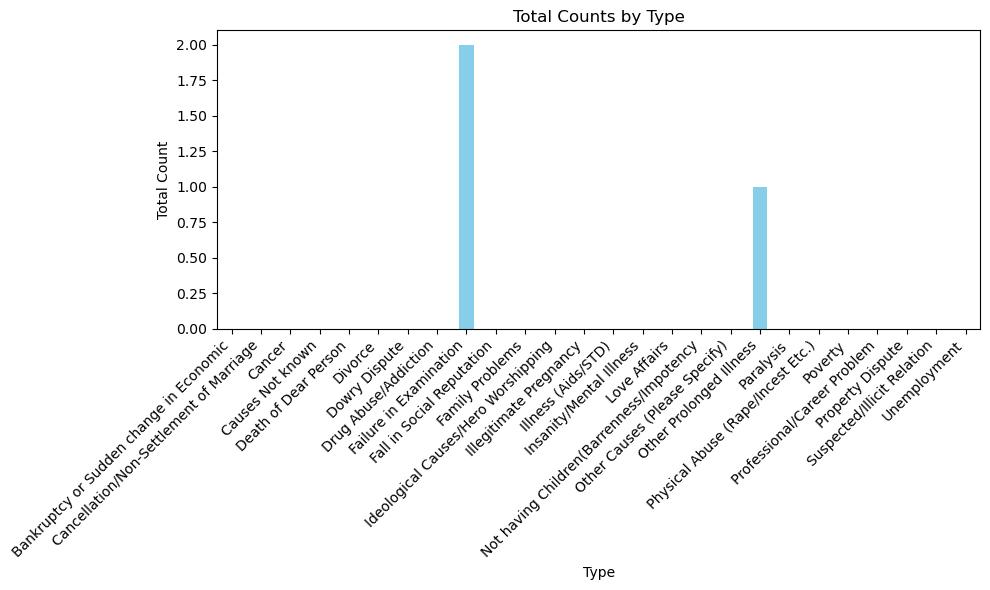

In [22]:
# Grouping the data by 'Type' and summing the 'Total' counts
type_counts = df.groupby('Type')['Total'].sum()

# Creating a bar chart
type_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')

# Adding title and labels
plt.title('Total Counts by Type')
plt.xlabel('Type')
plt.ylabel('Total Count')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Displaying the plot
plt.tight_layout()
plt.show()

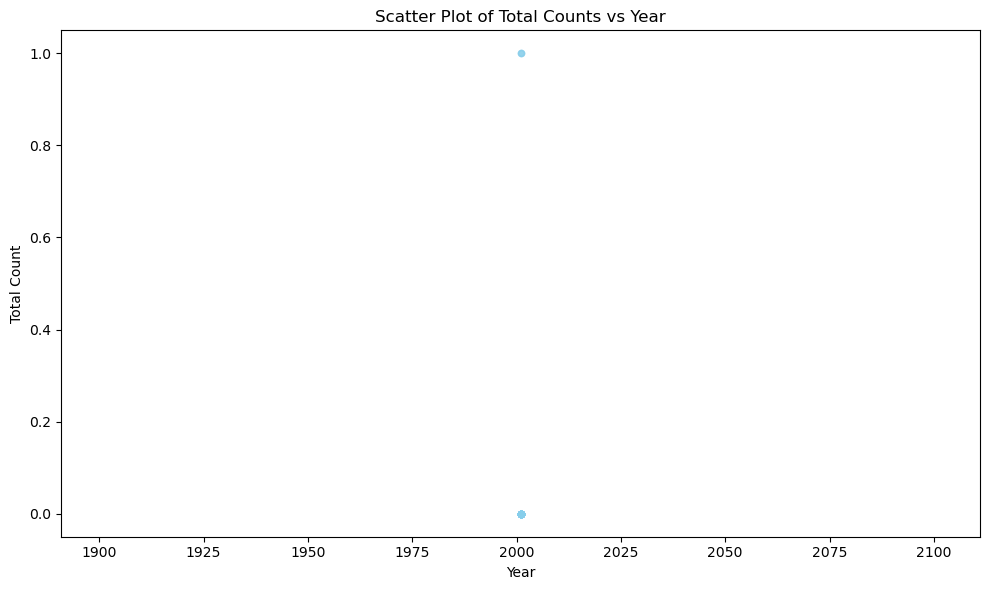

In [23]:
# Creating a scatter plot
df.plot.scatter(x='Year', y='Total', figsize=(10, 6), color='skyblue', alpha=0.5)

# Adding title and labels
plt.title('Scatter Plot of Total Counts vs Year')
plt.xlabel('Year')
plt.ylabel('Total Count')

# Displaying the plot
plt.tight_layout()
plt.show()

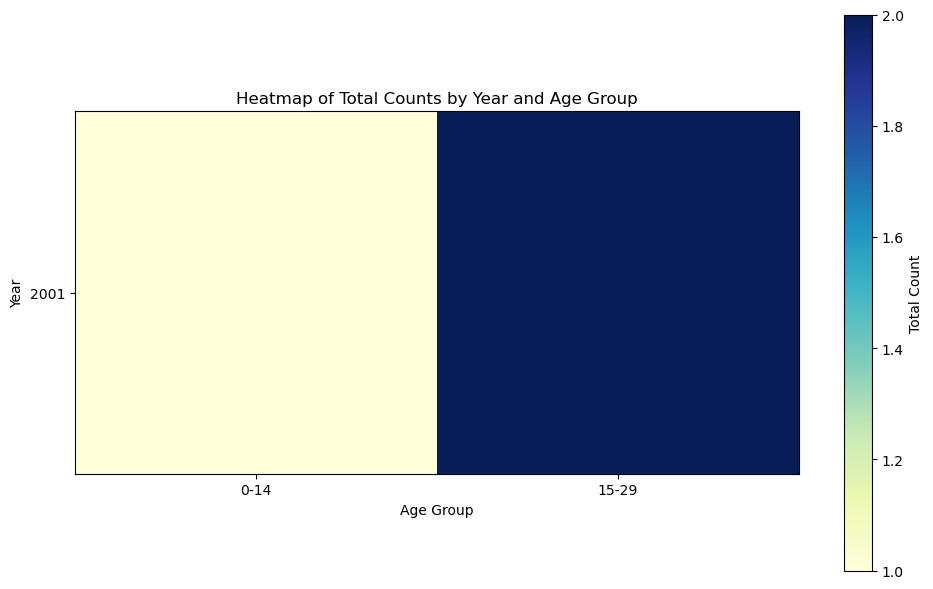

In [27]:
# Pivot the DataFrame to have 'Year' as rows, 'AgeGroup' as columns, and 'Total' as values
heatmap_data = df.pivot_table(index='Year', columns='AgeGroup', values='Total', aggfunc=np.sum)

# Create the heatmap
plt.figure(figsize=(10, 6))
plt.imshow(heatmap_data, cmap='YlGnBu', interpolation='nearest')

# Adding labels, title, and color bar
plt.xticks(np.arange(len(heatmap_data.columns)), heatmap_data.columns)
plt.yticks(np.arange(len(heatmap_data.index)), heatmap_data.index)
plt.xlabel('Age Group')
plt.ylabel('Year')
plt.title('Heatmap of Total Counts by Year and Age Group')
plt.colorbar(label='Total Count')

# Displaying the plot
plt.tight_layout()
plt.show()

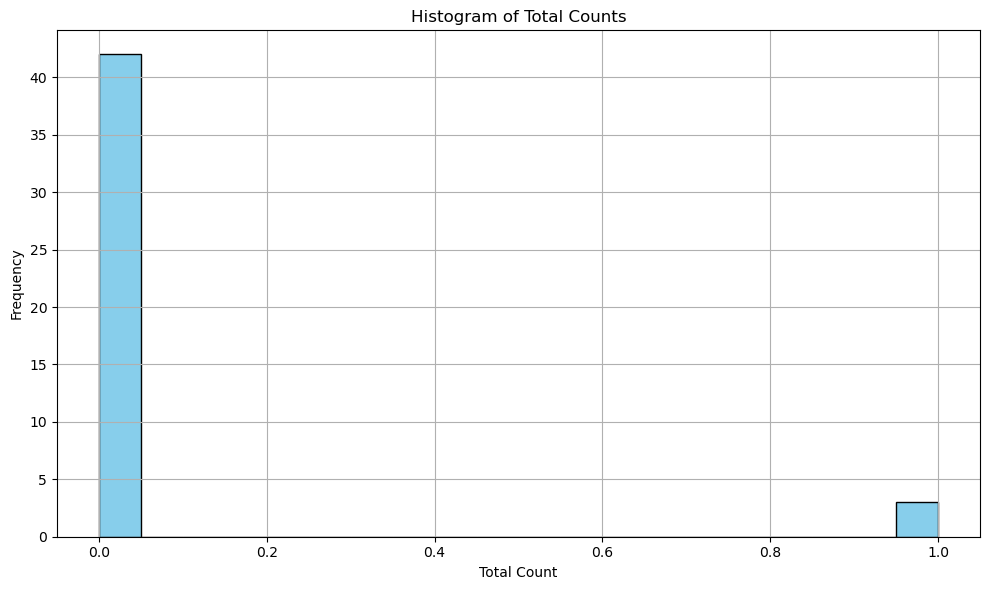

In [28]:
plt.figure(figsize=(10, 6))
plt.hist(df['Total'], bins=20, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Total Count')
plt.ylabel('Frequency')
plt.title('Histogram of Total Counts')

# Displaying the plot
plt.grid(True)
plt.tight_layout()
plt.show()

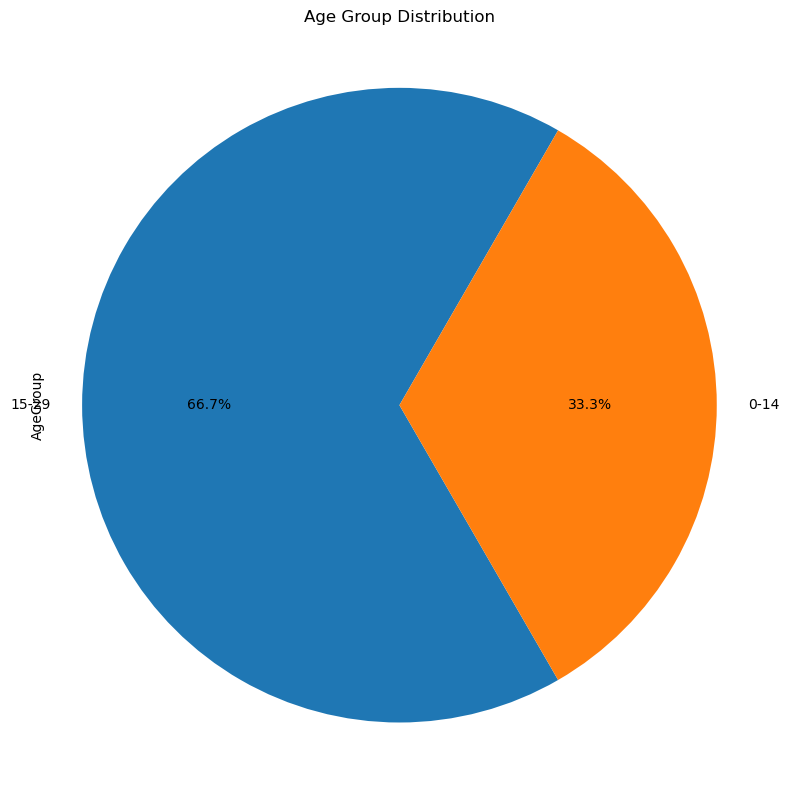

In [32]:
# Counting the occurrences of each age group
age_group_counts = df['AgeGroup'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
age_group_counts.plot.pie(autopct='%1.1f%%', startangle=60)

# Adding title
plt.title('Age Group Distribution')

# Displaying the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()